# 2.1 Какого музыканта Beatles я загадал или entropy reduction

[Text(0.5, 0.8333333333333334, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.25, 0.5, 'x[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.5, 'x[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]')]

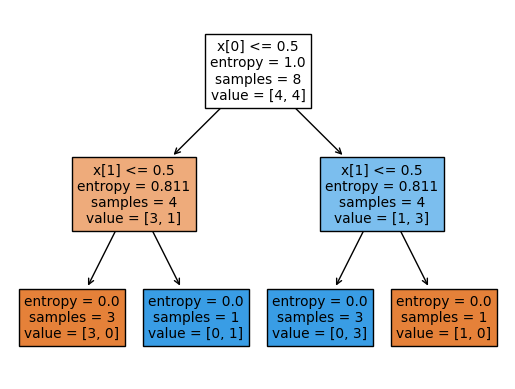

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
from math import log2

# тестовы датафрейм
data = pd.DataFrame(
  {
    'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 
    'Y': [1, 1, 1, 1, 0, 0, 0, 0]
  }
)

cls = tree.DecisionTreeClassifier(criterion='entropy')

X = data[['X_1', 'X_2']]
y = data.Y

# обучим наше дерево решений
learn_tree = cls.fit(X, y)

# отобразим визуализацию обучения
tree.plot_tree(learn_tree, filled=True)

## Шаг 6, задание
Представьте, что вы решили научить робота для животных отличать собачек от котиков. Для начала проанализируем данные - отметьте все верные утверждения о данном датафрэйме

Ответ:
![image](image/2_2_6.jpg)

[Text(0.5, 0.75, 'Гавкает <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]\nclass = собачка'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = собачка'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = котик')]

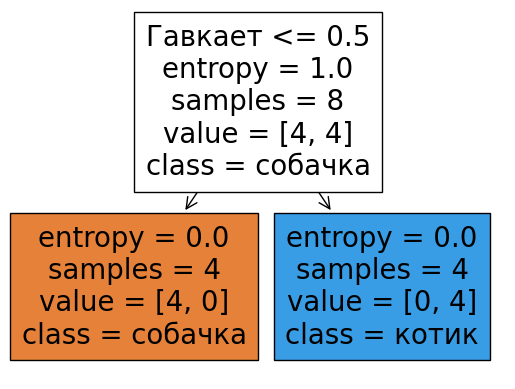

In [10]:
data_dogs = pd.read_csv('data/dogs.csv', index_col=0)
#data_dogs.info()

cls_dogs = tree.DecisionTreeClassifier(criterion='entropy')

fitches = data_dogs[['Гавкает' ,'Лазает по деревьям']]
animal_kind = data_dogs['Вид']

learn_tree = cls_dogs.fit(fitches, animal_kind)
tree.plot_tree(learn_tree, filled=True, class_names=['собачка', 'котик'], feature_names=list(fitches))



## Шаг 7, задание
В нашем Big Data датасэте появились новые наблюдения! Давайте немного посчитаем энтропию, чтобы лучше понять, формализуемость разделения на группы.

Формат записи - энтропия в группе, где переменная равна 0 и энтропия в группе, где переменная равна 1 (десятичный разделитель - точка, округляйте до 2-ого знака при необходимости).

И формула [энтропии](https://en.wikipedia.org/wiki/Entropy_(information_theory))

Решение:
![image](image/2_2_7_entropy_result.jpg)

Ответ:
![image](image/2_2_7.jpg)

In [19]:
sh_cls1_true = 5 / 9
sh_cls2_true = 4 / 9

sh_cls1_false = 1 / 1
sh_cls2_false = 1 / 1

sh_e1 = - sh_cls1_true * log2(sh_cls1_true) - sh_cls2_true * log2(sh_cls2_true)
sh_e2 = - sh_cls1_false * log2(sh_cls1_false) - sh_cls2_false * log2(sh_cls2_false)


## Шаг 8, задание
Ещё немного арифметики - посчитаем Information Gain по данным из предыдущего задания. Впишите через пробел округлённые до 2-ого знака значения IG для фичей Шерстист, Гавкает и Лазает по деревьям. Десятичным разделителем в данном задании является точка.

По какой переменной нужно делать сплит, исходя из всего этого (не вводите ответ на этот вопрос в поле, просто подумайте)

Формула Information Gain (IG):
IG = E( Y ) - E( Y / X )

Условная энтропия: 
E( Y / X) = n1 / N * E1 + n2 / N * E2
    
    N - кол-во наблюдений
    n1, n2 - размер выборки (когда находили энтропию, т.е. левый угол и правый)
    

In [26]:
def get_ig(e1, e2, n1, n2, n):
  return 0.971 - ((n1 / n * e1) + (n2 / n * e2))

ig_sherst = get_ig(0.99012, 0, 9, 1, 10)
ig_gav = get_ig(0.724, 0, 5, 5, 10)
ig_laz = get_ig(0, 0, 5, 4, 10)
print(round(ig_sherst, 2), ig_gav, ig_laz)

0.1 0.362 0.0
